In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from PIL import Image
from scipy.io import loadmat

np.random.seed(7)

# 1. K-Means Algorithm

In [ ]:
class KMeans:
    n_dims = 0
    centroids = None
    eps = 0.0

    # initialize model, K as hyperparameter
    def __init__(self, K, eps=1e-4):
        self.K = K
        self.eps = eps

    def fit(self, data, centroids, max_iter=1000):
        # set number of features
        N = len(data)
        if (N > 0):
            n_dims = N

        # sanity checks
        if (centroids.shape[0] != self.K or centroids.shape[1] != len(data[0])):
            raise RuntimeError("Incorrect centroids array dimensions!")
        if (data.dtype != centroids.dtype):
            raise TypeError("Data type mismatch! (dataset, centroids)")

        # save centroids
        self.centroids = centroids

        # initialize distance array
        distances = np.empty((self.K, N), dtype=data.dtype)

        for iter in range(max_iter):

            # calculate euclidean distance from centroids
            for i, centroid in enumerate(centroids):
                distances[i] = np.linalg.norm(data - centroid, axis=1)

            # assign data points to clusters
            classes = np.argmin(distances, axis=0)

            # initialize the new centroids
            new_centroids = np.zeros(self.centroids.shape, dtype=self.centroids.dtype)
            class_count = np.zeros((self.K, 1))

            # calculate new centroids
            for i in range(self.K):
                sliced = data[classes == i]
                if len(sliced) > 0:
                    new_centroids[i] = data[classes == i].mean(axis=0)
                else:
                    new_centroids[i] = 0

            # if none of the centroids changed, halt
            diff = np.linalg.norm(self.centroids - new_centroids, axis=1).sum()
            if (diff < self.eps):
                print(f"Convergence in {iter + 1} iterations.")
                break

            # else update centroids and enter next iteration
            self.centroids = new_centroids

    def cluster(self, data):
        N = len(data)

        # sanity checks
        if (self.centroids.shape[1] != len(data[0])):
            raise RuntimeError("Data/centroids dimension mismatch!")
        if (data.dtype != self.centroids.dtype):
            raise TypeError("Data type mismatch! (dataset, centroids)")

        # initialize distance array
        distances = np.empty((self.K, N), dtype=data.dtype)

        # calculate euclidean distance from centroids
        for i, centroids in enumerate(self.centroids):
            distances[i] = np.linalg.norm(data - centroids, axis=1)

        # assign data points to clusters
        classes = np.argmin(distances, axis=0)

        return classes

# 2. K-Means on Sample Images

## Dataset Loading 

In [ ]:
# read the images and normalize
ds2_14037 = plt.imread('Data/14037c.jpeg') / 255
ds2_14037_gs = plt.imread('Data/14037.jpeg') / 255

ds2_71046 = plt.imread('Data/71046c.jpeg') / 255
ds2_71046_gs = plt.imread('Data/71046.jpeg') / 255

# combine images in one array and flatten
dataset2 = np.array([ds2_14037.reshape(-1, 3) , ds2_71046.reshape(-1, 3)])
dataset2_gs = np.array([ds2_14037_gs.reshape(-1, 1) , ds2_71046_gs.reshape(-1, 1)])

# consider every pixel as a data point, across all images
dataset2.shape

(2, 154401, 3)

In [ ]:
# random initialization of centroids
centroid0 = np.random.uniform(0,1, 3)
centroid1 = np.random.uniform(0,1, 3)
centroid2 = np.random.uniform(0,1, 3)
centroid3 = np.random.uniform(0,1, 3)
centroid4 = np.random.uniform(0,1, 3)
centroids = np.array([centroid0, centroid1, centroid2, centroid3, centroid4], dtype=dataset2.dtype).reshape(-1, 3)
centroids

array([[0.97798951, 0.53849587, 0.50112046],
       [0.07205113, 0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904, 0.38094113],
       [0.06593635, 0.2881456 , 0.90959353],
       [0.21338535, 0.45212396, 0.93120602]])

In [ ]:
# random initialization of centroids
centroid0 = np.random.uniform(0,1)
centroid1 = np.random.uniform(0,1)
centroid2 = np.random.uniform(0,1)
centroid3 = np.random.uniform(0,1)
centroids_gs = np.array([centroid0, centroid1, centroid2, centroid3], dtype=dataset2.dtype).reshape(-1, 1)
centroids_gs

array([[0.02489923],
       [0.60054892],
       [0.9501295 ],
       [0.23030288]])

## Applying K-Means on Image 1

## RGB

In [ ]:
kmeans = KMeans(K=5)
kmeans.fit(dataset2[0], centroids, max_iter=1000)

# centroids
(kmeans.centroids * 255).astype('uint8')

Convergence in 2 iterations.


array([[230, 222, 201],
       [ 33,  62,  75],
       [145, 161, 162],
       [  0,   0,   0],
       [ 90, 135, 156]], dtype=uint8)

### Original Image

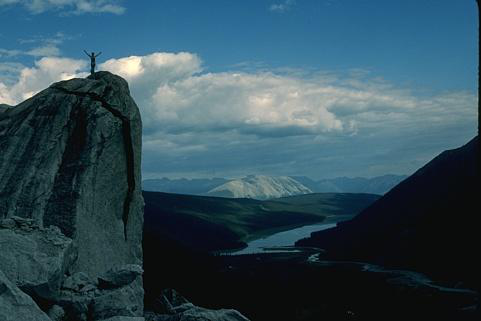

In [ ]:
original_image = Image.fromarray((ds2_14037 * 255).astype('uint8'))
original_image

### Segmented Image

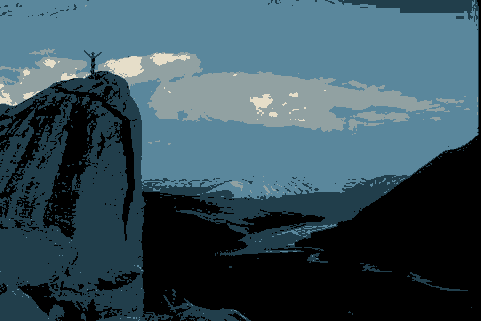

In [ ]:
y_pred = kmeans.cluster(dataset2[0])
MapToColor = lambda i : kmeans.centroids[i] * 255

recovered_14037 = MapToColor(y_pred).astype('uint8')
recovered_14037 = recovered_14037.reshape(ds2_14037.shape)

segmented_image = Image.fromarray(recovered_14037)
segmented_image

## Grayscale

In [ ]:
kmeans = KMeans(K=4)
kmeans.fit(dataset2_gs[0], centroids_gs, max_iter=1000)

# centroids
(kmeans.centroids * 255).astype('uint8')

Convergence in 2 iterations.


array([[ 14],
       [133],
       [216],
       [ 75]], dtype=uint8)

### Original Image

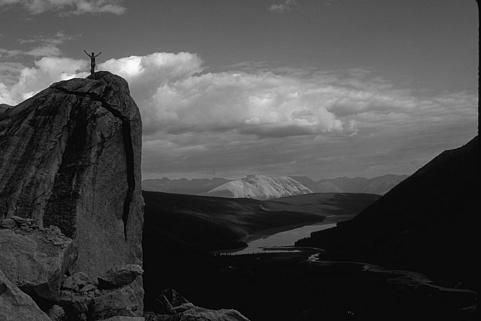

In [ ]:
original_image = Image.fromarray((ds2_14037_gs * 255).astype('uint8'), 'L')
original_image

### Segmented Image

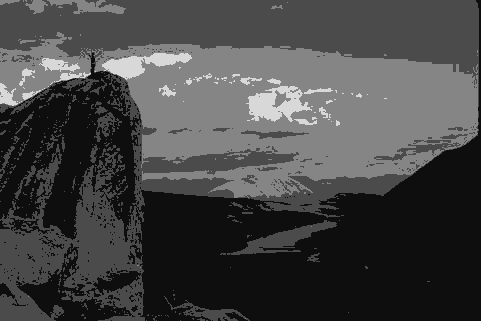

In [ ]:
y_pred = kmeans.cluster(dataset2_gs[0])
MapToColor = lambda i : kmeans.centroids[i] * 255

recovered_14037 = MapToColor(y_pred).astype('uint8')
recovered_14037 = recovered_14037.reshape(ds2_14037_gs.shape)

segmented_image = Image.fromarray(recovered_14037)
segmented_image

## Applying K-Means on Image 2

## RGB

In [ ]:
kmeans = KMeans(K=5)
kmeans.fit(dataset2[1], centroids, max_iter=1000)

# centroids
(kmeans.centroids * 255).astype('uint8')

Convergence in 2 iterations.


array([[198, 165, 153],
       [ 52,  66,  57],
       [119, 145, 147],
       [  0,   0,   0],
       [ 99, 136, 155]], dtype=uint8)

### Original Image

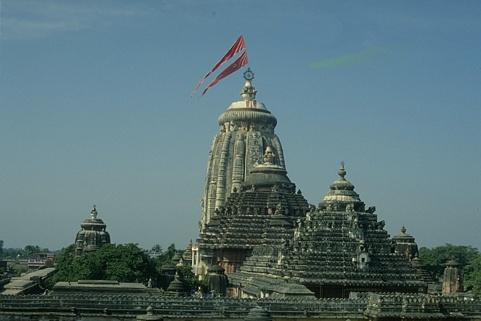

In [ ]:
original_image = Image.fromarray((ds2_71046 * 255).astype('uint8'))
original_image

### Segmented Image

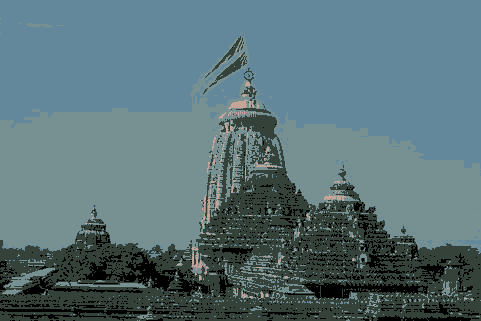

In [ ]:
y_pred = kmeans.cluster(dataset2[1])
MapToColor = lambda i : kmeans.centroids[i] * 255

recovered_71046 = MapToColor(y_pred).astype('uint8')
recovered_71046 = recovered_71046.reshape(ds2_71046.shape)

segmented_image = Image.fromarray(recovered_71046)
segmented_image

## Grayscale

In [ ]:
kmeans = KMeans(K=4)
kmeans.fit(dataset2_gs[1], centroids_gs, max_iter=1000)

# centroids
(kmeans.centroids * 255).astype('uint8')

Convergence in 2 iterations.


array([[ 21],
       [130],
       [211],
       [ 63]], dtype=uint8)

### Original Image

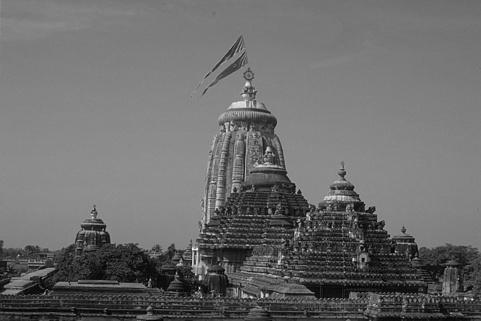

In [ ]:
original_image = Image.fromarray((ds2_71046_gs * 255).astype('uint8'), 'L')
original_image

### Segmented Image

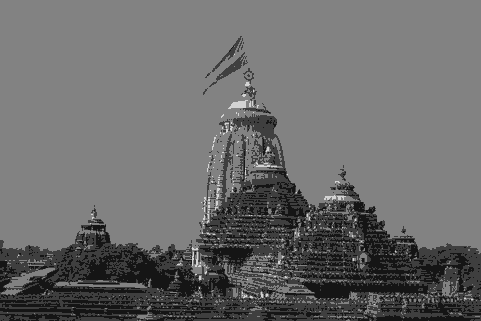

In [ ]:
y_pred = kmeans.cluster(dataset2_gs[1])
MapToColor = lambda i : kmeans.centroids[i] * 255

recovered_71046 = MapToColor(y_pred).astype('uint8')
recovered_71046 = recovered_71046.reshape(ds2_71046_gs.shape)

segmented_image = Image.fromarray(recovered_71046)
segmented_image